In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# set the max columns to none
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

from ast import literal_eval

from nltk import ngrams
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load user, hotel, and location data
df_user = pd.read_csv('https://raw.githubusercontent.com/zulfauzi92/Hotel_Recomendation_Model_Traveloka/main/Eksplorasi%20Data/Main%20Dataset/csv_final//Final_Dataset_User_ML.csv', index_col=[0])
df_hotel_ML = pd.read_csv('https://raw.githubusercontent.com/zulfauzi92/Hotel_Recomendation_Model_Traveloka/main/Eksplorasi%20Data/Main%20Dataset/csv_final//Final_Dataset_Hotel_ML.csv', index_col=[0])

In [5]:
df_hotel_ML

,hotel_id,total_review,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV,Remote Control

## Create Train Test Set For User Data 

In [ ]:
df_u = df_user.copy()

In [ ]:
# mengubah kolom reviewed_hotel dengan jumlah len arraynya (array di konversi menggunakan literal_eval)
df_u['reviewed_hotel'] = df_u['reviewed_hotel'].apply(lambda x: len(np.array(literal_eval(x))))
df_u

In [ ]:
df_u.sort_values(by='reviewed_hotel', ascending=False)

In [ ]:
df_u.groupby(by='reviewed_hotel').count()

In [ ]:
df_u.iloc[:, 3:]

In [ ]:
# split into train and test data from the user data
X = pd.concat([df_u['user_id'], df_u.iloc[:, 3:]], axis=1)
y = df_u['reviewed_hotel']

X_train_user, X_test_user, y_train_user, y_test_user = train_test_split(X, y, stratify=y, test_size=0.2)

In [ ]:
print('jumlah seluruh  : ', len(df_u))
print('jumlah data train : ', len(X_train_user))
print('jumlah data test : ', len(X_test_user))

In [ ]:
# pesebaran data train
y_train_user.groupby(by=y_train_user.values).count()

In [ ]:
# pesebaran data test
y_test_user.groupby(by=y_test_user.values).count()

In [ ]:
print(X_train_user.shape)
print(X_test_user.shape)

In [ ]:
X_train_user.head()

In [ ]:
plt.rcParams["figure.figsize"] = [10.00, 5]
plt.rcParams["figure.autolayout"] = True

df_y_train = pd.DataFrame(y_train_user)
df_y_test = pd.DataFrame(y_test_user)

df_y_train['data'] = 'train'
df_y_test['data'] = 'test'

df = df_y_train.append(df_y_test)

ax = sns.countplot(x='reviewed_hotel', data=df, hue='data')
ax.set_yscale('log')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_title('User Data Distribution Based on Reviewed Hotel (on logarithmic scale)')
plt.show()

## Create Train and Test Set For Hotel Data 

In [ ]:
df_h = df_hotel_ML.copy()
df_h

In [ ]:
print('total unique value dari total_review : ', len(df_h['total_review'].unique()))
arr_total_review = df_h['total_review'].unique()
arr_total_review.sort()
arr_total_review

In [ ]:
# change the total_review value into the its rank grouped into group of 2 
# (there is 82 unique item, then the total_review grouped into 41 group)
total_review_dict = pd.DataFrame([np.repeat(np.arange(1, 42), 2),arr_total_review]).T.set_index([1])[0].to_dict()
df_h['total_review'] = df_h['total_review'].apply(lambda x: total_review_dict.get(x))

In [ ]:
# split into train and test data from the user data
X = pd.concat([df_h['hotel_id'], df_h.iloc[:, 2:]], axis=1)
y = df_h['total_review']

X_train_hotel, X_test_hotel, y_train_hotel, y_test_hotel = train_test_split(X, y, stratify=y, test_size=0.2)

In [ ]:
print('jumlah seluruh  : ', len(df_h))
print('jumlah data train : ', len(X_train_hotel))
print('jumlah data test : ', len(X_test_hotel))

In [ ]:
# pesebaran data train
y_train_hotel.groupby(by=y_train_hotel.values).count()

In [ ]:
# pesebaran data test
y_test_hotel.groupby(by=y_test_hotel.values).count()

In [ ]:
print(X_train_hotel.shape)
print(X_test_hotel.shape)

In [ ]:
X_train_hotel.head()

In [ ]:
plt.rcParams["figure.figsize"] = [25, 10]
plt.rcParams["figure.autolayout"] = True

df_y_train = pd.DataFrame(y_train_hotel)
df_y_test = pd.DataFrame(y_test_hotel)

df_y_train['data'] = 'train'
df_y_test['data'] = 'test'

df = df_y_train.append(df_y_test)

ax = sns.countplot(x='total_review', data=df, hue='data')
ax.set_yscale('log')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set_title('Hotel Data Distribution Based on Total Review (on logarithmic scale)')
plt.show()

In [ ]:
# save train and test set for user and hotel data
# X_train_user.to_csv('Train_User.csv')
# X_test_user.to_csv('Test_User.csv')
# X_train_hotel.to_csv('Train_Hotel.csv')
# X_test_hotel.to_csv('Test_Hotel.csv')

# Evaluation 

## Long Tail Plot

In [12]:
import numpy as np
import scipy.stats

sigma = 1
mu = -0.5 * sigma**2

s = sigma  
scale = np.exp(mu)

tail_prob = 1.0 - scipy.stats.lognorm(s=s, scale=scale).cdf(5)
tail_prob

0.01745339995734907

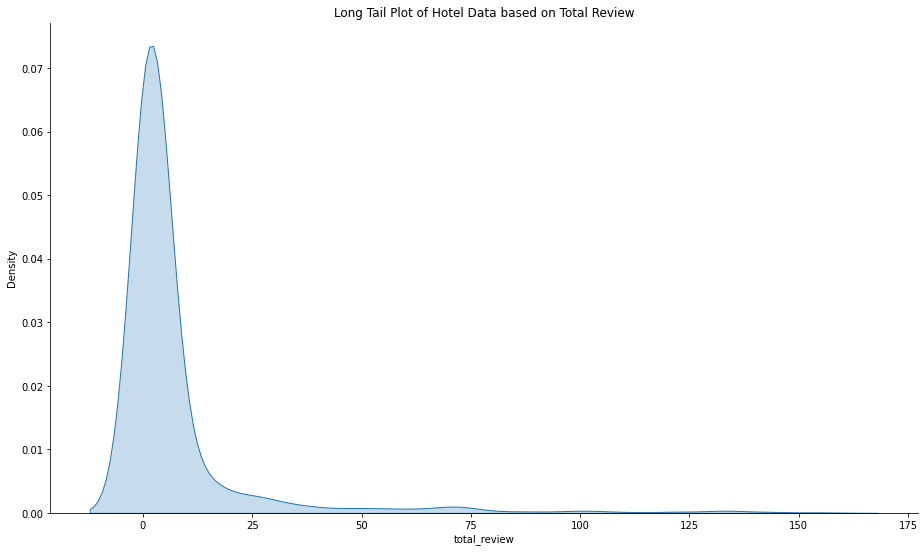

In [16]:
df_sorted_hotel = df_hotel_ML.sort_values(by='total_review', ascending=False).copy()
g = sns.displot(df_sorted_hotel['total_review'], kind='kde', fill=True)
g.fig.set_size_inches(15,8)
plt.title('Long Tail Plot of Hotel Data based on Total Review')
plt.show()

## MAP@K 

In [7]:
# !pip install -U "setuptools<58"
# !pip install ml_metrics
import ml_metrics

In [16]:
def eval_mapk(actual, prediction):
    return ml_metrics.mapk(actual,prediction)

In [42]:
# EXAMPLE INPUT
# number of recommendation item 5

# percobaan 5x dengan target hotel_id == 1
arr_actual_hotel_id = [[1],[1],[1],[1],[1]]

# hasil prediksi dari 5x percobaan
arr_prediction_hotel_id = [[1,2,3,4,5],[2,1,3,4,5],[3,2,1,4,5],[4,2,3,1,5],[4,2,3,5,1]]

eval_mapk(arr_actual_hotel_id, arr_prediction_hotel_id)

0.45666666666666667

In [41]:
# EXAMPLE INPUT 2
# variable number of recommendation item 

# percobaan 4x dengan target hotel_id == 5
arr_actual_hotel_id = [[5],[5],[5],[5]]

# hasil prediksi dari 4x percobaan dengan jumlah prediksi yang berbeda (2,4,5,6) 
# dimana data prediksi baru muncul kettika jumlah prediksi >5
arr_prediction_hotel_id = [[1,3],[1,3,4,10],[1,3,4,10,5],[1,3,4,10,5,7,11]]

eval_mapk(arr_actual_hotel_id, arr_prediction_hotel_id)

0.1

## Personalization Score (Cosine Similarity) 

In [77]:
# mengambil contoh user
example_user = df_user.iloc[0, 3:]
example_user

latitude               34.4
longitude            -119.8
hotel_star_rating       1.0
site_review_rating      1.0
Beach Hut                 0
                      ...  
Outdoor Parking         1.0
Porter Services         0.0
Spa Services            0.0
Poolside Cafe           0.0
Airport Transfer        0.0
Name: 0, Length: 274, dtype: object

In [64]:
# contoh prediksi
arr_prediction = [  6,  83, 138,  21,  84,   4,  62, 115,  77,  34]

def convertListInteger(identifier, list_int):
    converted = []
    for n in list_int:
        converted.append(identifier+'{0:06}'.format(n))
    return converted

hotel_id_prediction = convertListInteger('H', arr_prediction)
# melihat data hasil prediksi dalam bentuk full dataframe
df_hotel_ML[df_hotel_ML['hotel_id'].isin(hotel_id_prediction)].iloc[:,2:]

,latitude,longitude,hotel_star_rating,site_review_rating,Beach Hut,BnB,Bungalow,Cottage,Farm Stay,Guest House,Homestay,Hostel,Hotel,Houseboat,Lodge,Motel,Palace,Resort,Service Apartment,Tent,Villa,Bike on Rent,Drivers Rest Room,ATM / Banking,Access Via Exterior Corridors,Adjoining Rooms,Air / Rail Booking,Air-Conditioning - Central,Amphitheatre,Ayurvedic Facilities,Babysitting/ Child Care (surcharge),Badminttion Court,Baggage Room,Ballroom,Banquet Facilities,Bar / Lounge,Barbecue Area,Basketball Court,Beauty Salon - on charge,Billiards,Board Room,Bowling,Business Center,CCTV,Campfire / Bon Fire,Car Rental,Casino,Catering,Cell Phone Rental,Children's Park,City Shuttle Service,Clubhouse,Coffee Shop / Cafe,Computer Rental,Concierge,Conference Facility,Courier Service,Currency Exchange,Disabled Friendly Facilities,Disabled Friendly Rooms,Discotheque,Doctor on Call,Doorman,Dry Cleaning,Electronic / Magnetic Keys,Electronic Check-Out,Exhibit Space,Express Check-In / Check-Out,Express Laundry,Extra Person / Child - Share the same room,Family Room,Fax Machine,Fire Place Available,Fire Safety,First-Aid Kit at Front Desk,Fishing,Fitness Equipment,Floor Butler,Flower Shop,Free Local Calls,Front Desk,Full Time Operation for All 7 Days,Fun Floats,Games Zone,Gardens,Gift Shop,Golf Course,Grocery,Guide / Sightseeing Service,Health Club / Gym Facility Available,Hookah Lounge,In House Events,Internet Access - Surcharge,Jacuzzi,Karaoke,Kids Play Zone,Laundry Service Available,Library,Lift / Elevator,Limousine Service Available,Lobby,Local Tour / Travel Desk,Locker Facility,Major Credit Cards Accepted,Marina On Site,Massage Services,Medical Assistance Available,Metal Detectors,Mini Theatre,Multi Cuisine Restaurant,Multi Lingual Staff,Nature Walk,Night Club,Open Air Restaurant / Dining,Oxygen Cylinder (on request),Paid Transfers,Parking Facility,Party hall,Pest Control Facility,Pets Allowed,"Pick Up and Drop (Rly Station, Bus Stand, Temple)",Picnic Area,Pool Table,Postal / Parcel Services,Power Backup,Private / Plunge Pool,Private Beach,Public Restrooms,RO Water Purification System,Recreation Zone,Restaurant,Rooftop Garden,Sauna,Secretarial Services,Security at All Hotel Entrances,Self Check - In,Separate Sitting Area,Skiing Facility Available,Smoke Detector,Smoking Area,Solarium,Speciality Restaurant,Squash court,Stamps and Mailing Facility,Suites,Swimming Pool,Table Tennis,Taxi Services,Tennis Court,Valet service,Vegetarian Food / Jain Food Available,Veranda,Virtual Golf,Voicemail,Wake-up Call / Service,Water Dispenser Available,Wedding Services Facility,Welcome Drinks,Wheelchair Accessibility - Room,Whirlpool Bath / Shower Cubicle,X-Ray Machine at Entrance,120 AC,220 AC,Air Conditioning,Air Cooler,Alarm Clock,Attached Bathroom,Balcony,Bathrobe,Bathrobes,Bathroom Amenities,Bathtub,Bathtub Only,Bedside Table,Bidet,Blackout Drapes,Breakfast Available,Breakfast chargeable,Ceiling Fan,Centrally Heated,Channel Music,Climate Control,Closet,Clothes Dryer,Clothes Hook in Bathroom,Coffee Table,Complete Bedding,Complimentary Use of Bicycle,Computer,Cribs Available,Crockery / Cutlery,Curtains/Shades,Daily Room Cleaning,Desk,Direct Dial Phone,Disabled Friendly Bathrooms,Do-Not-Disturb Notice,Dressing Area,Dustbins,Ensuite / Private Bathroom,"Extra Bed, Towels, Linens, Bedding (on request)",Extra Toilteries on Demand,Full Kitchen,Gas Cylinder - Chargeable,HD / LCD Satellite TV,Hairdryer,Handicapped Facilities,Hill View from all Rooms,Hot / Cold Running Water,Housekeeping,Ice Bucket on Demand,In-room Storage Space,Induction Plate,International Switch Plugs (on request),Kitchenette,Luggage Rack,Mineral Water,Mini Bar,Mini Refrigerator,Mirror,Modern Toilet Facilities,Movie Channels,Movies &amp; Games on demand,Newspapers,No Smoking Room,Patio - Property,Phone Messaging Services,Pillow menu,Premium Amenities / Toiletries,Premium Beddings / Hypo-Allergenic,Primium Bathrooms,Private Garden,Radio,Reading Lamps,Remote Control TV,Remote Controlled Lights and Fan,Rol

In [85]:
from scipy import spatial
# NOTE : karena fitur berbentuk sparse sehingga nilai cosine tinggi, solusi mungkin dimensionality reduction PCA
def eval_cosinesimilarity(user, prediction):
    hotel_id_prediction = []
    for n in prediction:
        hotel_id_prediction.append('H{0:06}'.format(n))
    df_hotel_id_prediction = df_hotel_ML[df_hotel_ML['hotel_id'].isin(hotel_id_prediction)].iloc[:,2:]
    total_predict = len(df_hotel_id_prediction)
    if total_predict > 1:
        arr_hotel = []
        for i,item in df_hotel_id_prediction.iterrows():
            arr_hotel.append(1 - spatial.distance.cosine(user, item.values))
        prediction = sum(arr_hotel)/len(arr_hotel)
    else:
        prediction = 1 - spatial.distance.cosine(user, prediction)
        
    return prediction

# arr_prediction = [  6,  83, 138,  21,  84,   4,  62, 115,  77,  34]
arr_prediction = [ 26,  183, 1138,  321,  44,   24,  72, 515,  377,  904]

eval_cosinesimilarity(example_user, arr_prediction)

0.989977414515724